
<h1 style="background: linear-gradient(to right, #49A, #0FB); color: white; padding: 20px;">Program 9 Implementation: Bayesian network</h1>

<ol start="9">
    <li>Implement and demonstrate the working of SVM algorithm for classification    </li>
</ol>



Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



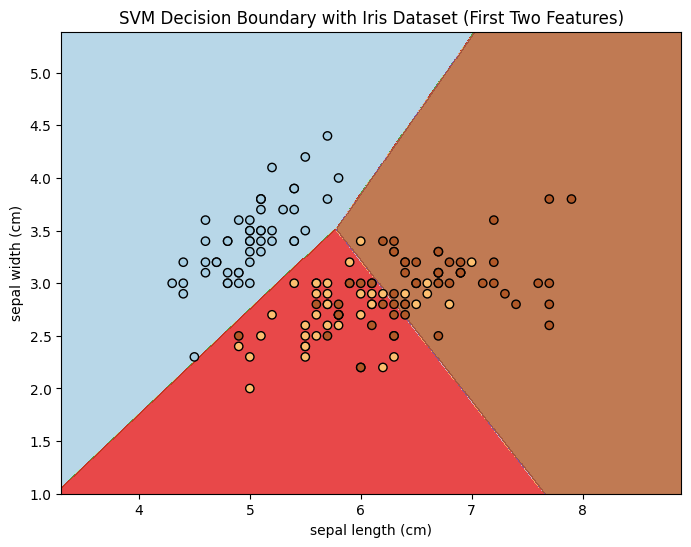

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load and split the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
X_vis = X[:, :2]
X_train_vis, X_test_vis, _, _ = train_test_split(X_vis, y, test_size=0.3, random_state=42)
svm_model_vis = SVC(kernel='linear', C=1.0, random_state=42)
svm_model_vis.fit(X_train_vis, y_train)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.title("SVM Decision Boundary with Iris Dataset (First Two Features)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()